# Explainable AI (XAI) Tutorial with SHAP and LIME
## Presented by Dr. Sakinat Folorunso

Welcome to this hands-on notebook on Explainable Artificial Intelligence (XAI) using SHAP (SHapley Additive exPlanations) and LIME.

👩🏾‍💻 **Facilitator**:  
**Dr. Sakinat Oluwabukonla Folorunso**  
Associate Professor of AI Systems and FAIR Data Science  
Olabisi Onabanjo University, Ago-Iwoye, Ogun State, Nigeria  
[Google Scholar](https://scholar.google.com/citations?user=ysoR2G0AAAAJ&hl=en) | [GitHub](https://github.com/Sakinat-Folorunso) |
[Website](https://sites.google.com/view/sakinatfolorunso/home) | [GitHub](https://github.com/Sakinat-Folorunso/XAI-Tutorial/tree/main)

🔍 **About Me**:  
I am a researcher, educator, and AI community leader passionate about leveraging Artificial Intelligence, Machine Learning, and FAIR Data Science
for health, culture, equity, and innovation in Africa. My work includes developing explainable AI systems for diagnostics, promoting AI literacy,
and preserving indigenous knowledge using data science.


🎯 **Objective of This Notebook**:  
This tutorial demonstrates how to use SHAP and LIME to interpret model predictions using real-world health data. You will learn how to:
- Train a binary classification model on patient data
- Apply SHAP for both **global** and **local** interpretability
- Visualize predictions using summary plots, force plots, and decision plots

> Let's make AI not just powerful, but understandable.

Happy coding! 🚀  


# Notebook 1: Explainable AI on Tabular Data
### Use Case: Breast Cancer Prediction / Loan Default Classification

**Tools Used**: XGBoost, LightGBM, SHAP, LIME
**Objective**: Understand and visualize model predictions with SHAP and LIME.

## 🔍 What is SHAP?

**SHAP (SHapley Additive exPlanations)** is a unified framework for **interpreting predictions** of machine learning models. It is based on game theory, particularly the concept of **Shapley values**, introduced by Lloyd Shapley in 1953.

Shapley values come from cooperative game theory and represent a **fair distribution of “payout” (contribution)** among players (features) who have cooperated to produce an outcome (prediction).

In ML, SHAP quantifies:

> *“How much did each feature contribute to a particular prediction or to the model globally?”*



## 🧠 Why Use SHAP?

* It is **model-agnostic** and works for both black-box and white-box models.
* It provides **consistent and locally accurate** explanations.
* It offers **global interpretation** by summarizing over many local explanations.
* It satisfies **additivity**: prediction = base value + sum of SHAP values.


## 🔎 SHAP Values: Intuition

Consider a loan approval model. A prediction of approval (yes) is made. SHAP tries to answer:

> **How did each feature (e.g., credit score, income, age) contribute to this prediction?**

The model’s output is decomposed into **base value + contributions from each feature**.


## 🧩 SHAP Explanation Types

### 1. **Local Explanation**

Shows **why a specific prediction was made**. It answers:

> “For this individual patient or applicant, why did the model make this decision?”

* Each feature is assigned a **SHAP value** indicating its impact on the deviation from the model's **base value** (mean prediction).
* Can be visualized with:

  * **Force plots**
  * **Waterfall plots**
  * **Decision plots**

#### ✅ Use Case:

>  Breast Cancer Prediction
>  Loan Default Classification
> Clinical diagnosis explanation for a specific patient.


### 2. **Global Explanation**

Summarizes the model’s behavior **across the entire dataset**.

* Aggregates SHAP values across all instances.
* Shows which features are **most important overall**.
* Visualized with:

  * **Summary plots (dot plots)**
  * **Bar plots**
  * **Beeswarm plots**

#### ✅ Use Case:

> Understanding which features drive loan approvals overall in a dataset.


## 🧪 How SHAP Works Internally

* It considers all possible feature combinations (subsets).
* Calculates the **marginal contribution** of each feature across all permutations.
* Aggregates contributions using a **weighted average** that guarantees fairness.

Mathematically:

$$
\phi_i = \sum_{S \subseteq N \setminus \{i\}} \frac{|S|!(n - |S| - 1)!}{n!} \left[ f(S \cup \{i\}) - f(S) \right]
$$

Where:

* $\phi_i$ = SHAP value for feature $i$
* $S$ = subset of all features excluding $i$
* $f(S)$ = model prediction with features in $S$
* $n$ = total number of features

Because this is computationally expensive, SHAP uses:

* **TreeExplainer** for decision trees
* **KernelExplainer** for any model
* **DeepExplainer** for neural networks


## 📊 SHAP Visualizations

### 🔹 Summary Plot (Global)

* Shows feature importance across the dataset.
* Color = feature value (low → high)
* X-axis = SHAP value (impact)

### 🔹 Force Plot (Local)

* Shows how features push the prediction from base value up or down.

### 🔹 Waterfall Plot (Local)

* Like force plot but cleaner; feature contributions are stacked step-by-step.

### 🔹 Dependence Plot

* Shows interaction of a feature's value and its SHAP value.


## 💡 Practical Example

Prediction task: Breast Cancer (malignant vs benign)

```python
import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Global summary plot
shap.summary_plot(shap_values, X_test)

# Local explanation for instance 0
shap.plots.waterfall(shap_values[0])
```

## 🧠 Benefits of SHAP

✅ Consistent
✅ Theoretically sound
✅ Widely supported in Python
✅ Applicable across models and domains
✅ Visual and intuitive explanations

## ⚠️ Limitations

* **Computational cost**: especially with many features.
* **Assumes feature independence** (except TreeExplainer).
* **Can be misinterpreted**: requires understanding of base values and context.


## 🏁 When to Use SHAP

| Use Case                            | SHAP Explanation      |
| ----------------------------------- | --------------------- |
| Patient diagnosis                   | Local                 |
| Loan default reasons                | Local                 |
| Feature importance for policymakers | Global                |
| Debugging a model                   | Local + Global        |
| Fairness audit                      | Global (feature bias) |

In [ ]:
# Install required packages
!pip install shap

In [ ]:
# Install required packages
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=589d71f1573071ad3c0e1ae0556d5414d0b186e5f8fb795338a0cd23ddad3b61
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
# Install required packages
!pip install xgboost

In [ ]:
# Install required packages
!pip install lightgbm

## Step 0: Import all necessary libraries

This block initializes:

Essential data science libraries (pandas, numpy, matplotlib)
SHAP for explainability
Scikit-learn utilities for splitting data and evaluating model performance
SMOTE for handling class imbalance
Suppression of warnings to keep notebook output clean

In [ ]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

## Step 1: Load Dataset

### Dataset Information: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic  

Interactive image processing techniques, along with a linear-programming-based inductive classifier, have been used to create a highly accurate system for diagnosis of breast tumors.
A small fraction of a fine needle aspirate slide is selected and digitized. With an interactive interface, the user initializes active contour models, known as snakes, near the boundaries of a
set of cell nuclei. The customized snakes are deformed to the exact shape of the nuclei. This allows for precise, automated analysis of nuclear size, shape and texture. Ten such features are
computed for each nucleus, and the mean value, largest (or "worst" ) value and standard error of each feature are found over the range of isolated cells. After 569 images were analyzed in this fashion, different combinations of features were tested to find those which best separate benign from malignant samples. T

Additional Information Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image.
A few of the images can be found at http://www.cs.wisc.edu/~street/images/Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree.  Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.


## Explanation:       

| Line                           | Description                                                                                             |
| ------------------------------ | ------------------------------------------------------------------------------------------------------- |
| `df = pd.read_csv('data.csv')` | Loads the CSV file named `'data.csv'` into a pandas DataFrame called `df`.                              |
| `df.head()`                    | Displays the **first 5 rows** of the dataset, useful for quickly inspecting the structure and contents. |


In [11]:
# prompt: code to mount drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
#Loads the datase

df = pd.read_csv('/content/drive/My Drive/DSA TUTORIAL/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
# This line returns the dimensions of the DataFrame df as a tuple
#shape of the dataframe
df.shape

(569, 32)

In [16]:
# concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
#This command generates descriptive statistics of the DataFrame's numeric columns only.

df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [18]:
# mapping categorical values to numerical values
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})

In [19]:
#The df.corr() method computes pairwise correlation coefficients between all numeric columns in a DataFrame.

df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


Read dataset, have a glipse of the dataset, separate to features and labels, then check the feature vector

In [20]:
# dropping id column
df.drop('id',axis=1, inplace=True)

In [21]:
# Define features and target
target_col = 'diagnosis'
X = df.drop(columns=[target_col])
y = df[target_col]

## Step 2: Train Model:   XGBoost and LightGBM

In [22]:
from sklearn.model_selection import train_test_split

# 🎯 Splitting the dataset into features (X) and target (y)
# df.drop('diagnosis', axis=1) removes the 'diagnosis' column — this becomes the feature set (X)
# df['diagnosis'] selects the label column — this becomes the target variable (y)

# ✂️ Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('diagnosis', axis=1),   # features
    df['diagnosis'],                # target
    test_size=0.2,                  # 20% for testing, 80% for training
    random_state=42                 # ensures reproducibility
)

# 📏 Output the shape of the training and testing sets
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (455, 30)
Shape of test set: (114, 30)


## Feature Scaling Using StandardScaler

🔍 When to Use StandardScaler:
When your features are numeric and not on the same scale

Especially important for algorithms sensitive to feature magnitude:
Logistic Regression, SVM, KNN, PCA, clustering, etc.

In [23]:
from sklearn.preprocessing import StandardScaler

# 🧪 Initialize the StandardScaler
ss = StandardScaler()

# 🔄 Fit the scaler on the training data and transform it
X_train = ss.fit_transform(X_train)

# ⚠️ Note: Use transform (not fit_transform) on the test set to avoid data leakage
X_test = ss.fit_transform(X_test)

## Training with XGBoost

In [24]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 🔧 Initialize the XGBoost classifier
model = XGBClassifier(
    use_label_encoder=False,  # disables legacy label encoding
    eval_metric='logloss'     # evaluation metric for binary classification
)

# 🎯 Train the model using the training set
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:

#Optional: Switch to LightGBM

#If you'd like to test a LightGBM classifier instead


#model = LGBMClassifier()
#model.fit(X_train, y_train)


## Code with Inline Explanation: Model Prediction and Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



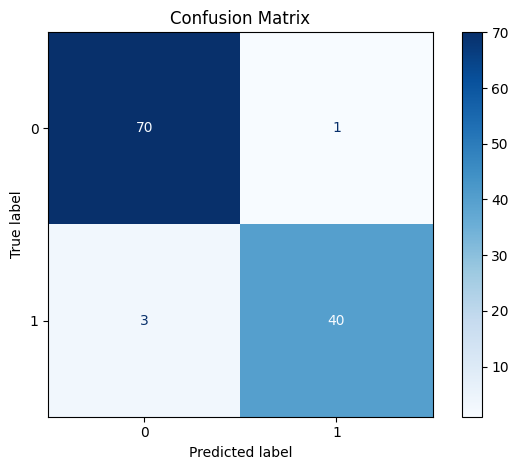

In [25]:
# === Predict and Evaluate ===

# 🧠 Predict labels for the test set
y_pred = model.predict(X_test)

# 📊 Print classification report: precision, recall, F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 🔢 Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 🎨 Create a visual display of the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # color scheme for clarity
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


### Step 3: SHAP Explanation (Global + Local)

## Code with Inline Explanation: SHAP Explainability for Tree Models

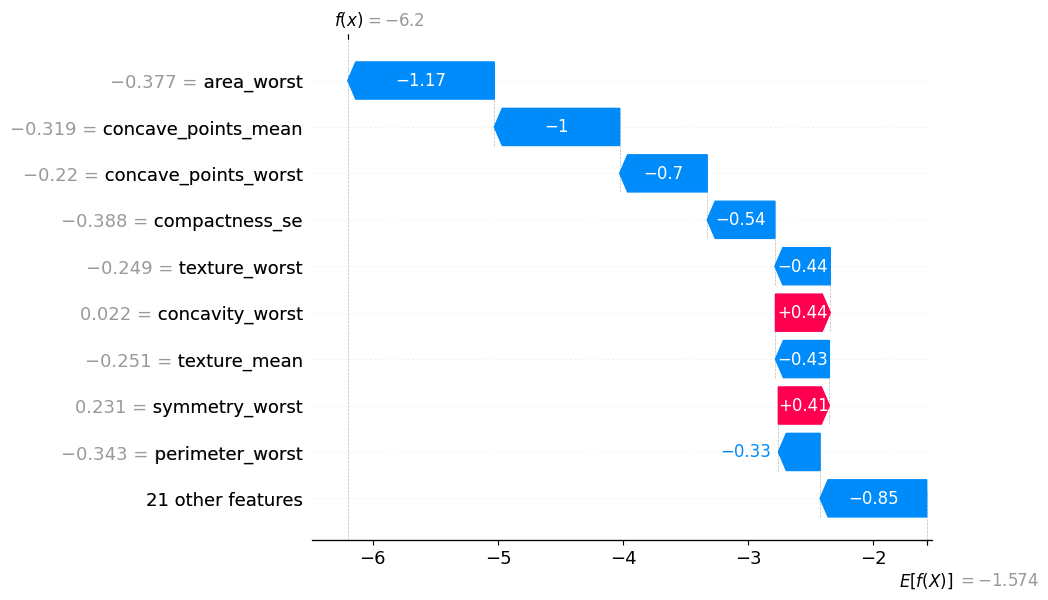

In [27]:
# === SHAP Explainability ===
import shap
import pandas as pd
import numpy as np

# 1. Waterfall Plot
# 🧠 Create a SHAP explainer for tree-based models (XGBoost, LightGBM, etc.)
explainer = shap.Explainer(model, X_train, algorithm="tree")

# ✅ Ensure X_test is a DataFrame (needed for SHAP to access feature names)
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=X.columns)

# 📦 Select a small sample of test data for SHAP analysis
X_sample = X_test.reset_index(drop=True).iloc[:50]

# 🔍 Compute SHAP values for the sample
shap_values = explainer(X_sample)

# 🎯 Visualize SHAP values for the first instance using a waterfall plot
shap.plots.waterfall(shap_values[0])


## 🧠 **Interpreting the SHAP Waterfall Plot**

### 🧾 Title: *“Explaining a Single Model Prediction Step-by-Step”*

This **waterfall plot** explains **why a machine learning model made a specific prediction** for a single patient (or data sample) by showing how
**each feature pushes the prediction higher or lower** from the average model prediction.


### 📊 **Plot Breakdown**

* **E\[f(X)] = -1.575**:
  This is the **base value** — the average model output across all patients in the training dataset.

* **f(x) = -6.202**:
  This is the **predicted value for this specific patient** after adding or subtracting all feature contributions (SHAP values).

* Each **bar** shows the contribution of a single feature:

  * **Blue bars**: These features **lowered the prediction** (pushed it left)
  * **Red bars**: These features **raised the prediction** (pushed it right)
  * **Bar length** = magnitude of impact
  * **Feature value** is shown on the left (e.g., `area_worst = -0.377`)


### 🎯 **Example Interpretation for This Patient**

* The model started from a base value of `-1.575`.

* The feature **`area_worst`** had the **largest negative impact** (`-1.17`) on the prediction.

* Other strong **negative influencers**:

  * `concave_points_mean`, `concave_points_worst`, `compactness_se`, etc.

* Features like **`concavity_worst`** and **`symmetry_worst`** had small **positive impacts**, trying to increase the prediction.

* The **final prediction of -6.202** suggests that, based on the model, this patient has a **very low risk score** or is **likely classified as "non-risk" or "negative"** — depending on your model.



### 👥 **Teaching Insight**

Use this SHAP plot to explain:

* **How machine learning can be made explainable** even for non-technical stakeholders.
* The **clinical analogy**: This is like a **doctor explaining their reasoning**: “Because of X, Y, and Z factors, I think this patient is low risk.”
* Helps foster **trust**, **accountability**, and **fairness** in AI systems — especially critical in **healthcare, agriculture, and public policy**.

---

### 🧰 Takeaway Message for Participants:

> SHAP Waterfall plots give **transparency** into AI decisions.
> They enable **auditable, interpretable, and trustworthy** model predictions.
> This is essential for deploying AI solutions **ethically and effectively in African contexts**.

## Code with Inline Explanation: SHAP Summary Plot (Dot)

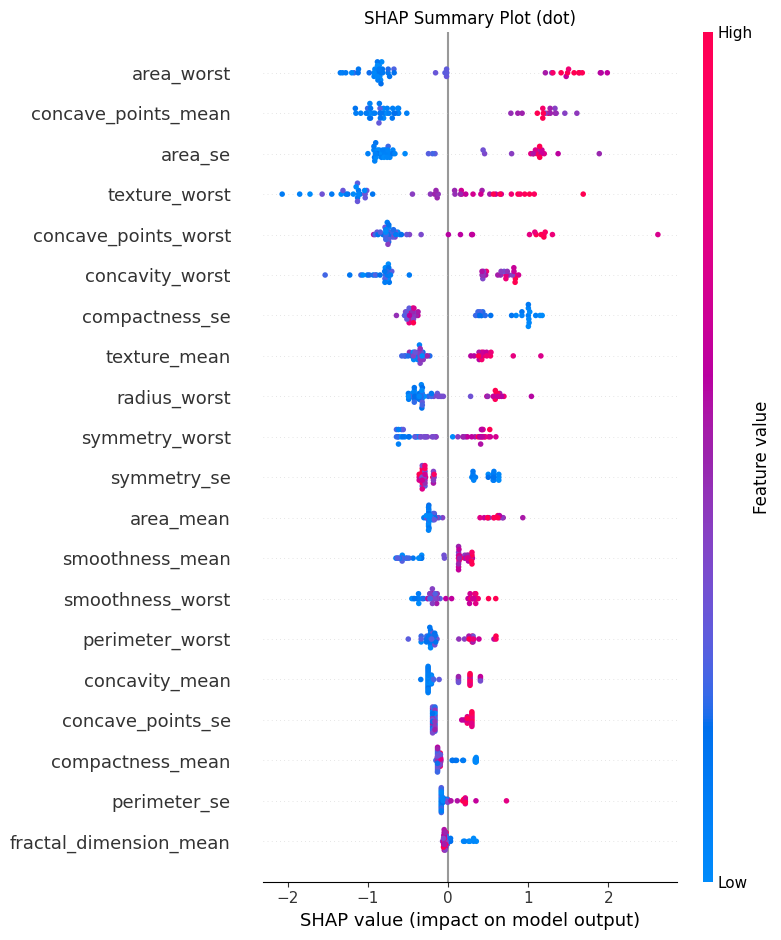

In [28]:
# === SHAP Summary Plot (Dot) ===

# 2. Summary Plot (dot)
shap.summary_plot(
    shap_values,     # SHAP values computed for X_sample
    X_sample,        # Corresponding input data
    plot_type="dot", # Dot plot (default): shows distribution of SHAP values per feature
    show=False       # Prevents auto-display in some environments (like scripts)
)

# 🎨 Customize the plot appearance
plt.title("SHAP Summary Plot (dot)")
plt.tight_layout()
plt.show()


## 📊 **Understanding the SHAP Summary Plot (Dot Plot)**

### 🔍 Title: *"Which Features Matter, and How Do They Affect the Model?"*

This SHAP summary plot gives a **global overview of model behavior**, showing **which features are most important** and **how their values influence predictions** across the entire dataset.

### 🧩 How to Read This Plot

* **Y-axis**: Feature names (ranked by importance from top to bottom)
* **X-axis**: SHAP value (how much the feature increases or decreases the model’s prediction)

  * Right of 0 → pushes prediction **higher**
  * Left of 0 → pushes prediction **lower**
* **Each dot**: One sample (patient or observation)
* **Color**: Value of the feature

  * 🔵 Blue = Low value
  * 🔴 Red = High value

### 🎯 Example Interpretations

* **Top 3 impactful features**:

  * `area_worst`, `concave_points_mean`, `area_se`

* For `area_worst`:

  * High values (red) **increase prediction** → likely associated with positive class (e.g., higher cancer risk)
  * Low values (blue) **decrease prediction**

* For `concavity_worst`:

  * Similar pattern: the more extreme the value, the more it pushes predictions in one direction

### 💡 What This Means for Your Audience

* This plot answers two questions at once:

  1. **Which features are most influential in the model’s decisions?**
  2. **What is the direction of their influence?**
* Participants can use this to debug their models and ensure predictions align with domain knowledge.

### 👥 Teaching Insight

* **For Health**: “Larger tumor area contributes more to predicting malignancy”
* **For Agriculture**: “High soil moisture lowers drought prediction”
* **For Finance**: “Low account age increases risk of loan default”

Encourage participants to:

* **Look for patterns in red vs. blue distributions**
* **Think critically**: Are the most impactful features also the most ethical or fair to use?

### 🧠 Takeaway Message

> SHAP Summary Plots are like **X-rays of your AI model** — they show both the **bones of importance** and the **direction of influence**.
>
> Our goal isn’t just to build models, but to understand them — and explain them to the communities we serve.


### Code with Inline Explanation: SHAP Summary Plot (Bar)

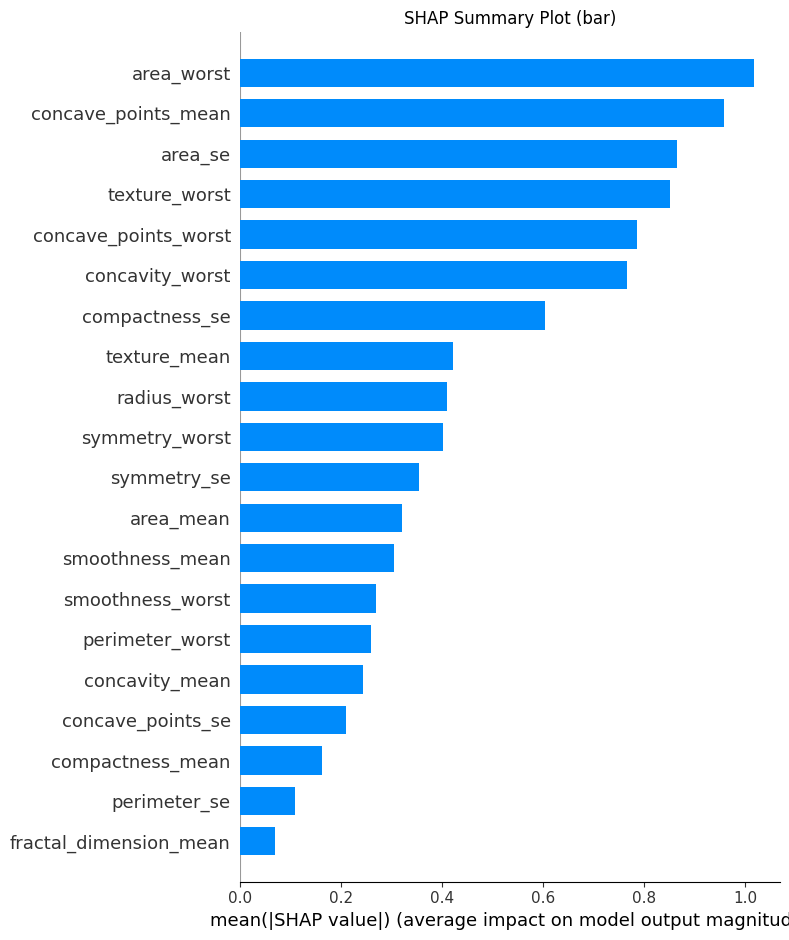

In [29]:
# === SHAP Summary Plot (Bar) ===

# 3. Summary Plot (bar)
shap.summary_plot(
    shap_values,      # SHAP values computed from the sample
    X_sample,         # Corresponding input features
    plot_type="bar",  # Bar plot shows mean absolute SHAP values per feature
    show=False        # Disables auto-display in some notebook environments
)

# 🏷 Add custom title and formatting
plt.title("SHAP Summary Plot (bar)")
plt.tight_layout()
plt.show()


## 📊 **SHAP Summary Plot (Bar)**

### 📌 Title: *“Which Features Are Most Influential in My Model?”*

This **bar plot** is one of the simplest and most effective global SHAP visualizations. It shows the **average importance** of each feature across all predictions — without regard to whether the impact was positive or negative.


### 🧠 How to Read This Plot

* **Y-axis**: List of features (e.g., `area_worst`, `concave_points_mean`, etc.)
* **X-axis**: Mean of the **absolute SHAP value** for that feature — i.e., average contribution to the model output across all samples.
* **Longer bars = more important features**.


### 🔍 Key Insights from the Plot

* `area_worst`, `concave_points_mean`, and `area_se` are the **most influential features**.
* These features consistently had **high impact** on the model’s decisions, regardless of direction.
* Features at the bottom like `fractal_dimension_mean` and `perimeter_se` contributed **very little** on average.


### 🧬 Example for Health Data (as shown):

This plot could help healthcare professionals answer:

* “Which features are driving cancer predictions the most?”
* “Should we pay more attention to measuring `area_worst` in screening?”


### 👥 Teaching Insight

For participants from:

* **Healthcare**: Interpret what highly ranked features mean for risk classification.
* **Agriculture**: Understand which environmental factors (e.g., soil, humidity) most affect crop predictions.
* **Finance**: Identify key drivers of loan default, fraud detection, or customer churn.

This plot is a **first-step diagnostic tool** for:

* Explaining model behavior to stakeholders
* Validating model decisions
* Guiding domain experts in feature selection or investigation

### 💬 Communicating with Non-Technical Stakeholders

> “If we had to explain this model in plain language, we’d say:
> **‘These are the features the AI listens to the most.’**”


### 🧰 Takeaway Message for the Tutorial

> SHAP bar plots simplify interpretability by ranking features by their overall contribution to decision-making — making AI **more transparent**, **more explainable**, and **more trustworthy** in African applications.


### Code with Inline Explanation: SHAP Dependence Plot

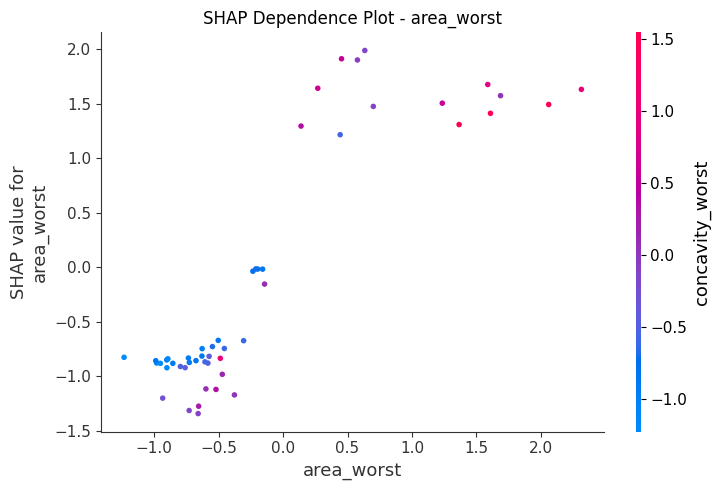

In [30]:
# === SHAP Dependence Plot ===

# 4. Automatically identify the top feature (by average SHAP value magnitude)
top_feature = X_sample.columns[np.argmax(np.abs(shap_values.values).mean(axis=0))]

# 🔍 Plot the dependence of SHAP values on this feature
shap.dependence_plot(
    top_feature,           # the most impactful feature globally
    shap_values.values,    # SHAP values (numpy array)
    X_sample,              # corresponding feature values
    show=False             # prevent auto-display
)

# 🎨 Add plot title and formatting
plt.title(f"SHAP Dependence Plot - {top_feature}")
plt.tight_layout()
plt.show()


## 📈 **SHAP Dependence Plot**

### 🔍 Title: *“How Feature Values and Interactions Influence Model Predictions”*

This plot goes deeper than ranking feature importance — it helps us understand **how** the model responds to different values of a feature, and how **feature interactions** might change its behavior.


### 🧩 How to Read This Plot

* **X-axis**: Actual values of the feature `area_worst` for different data points (patients, observations, etc.)
* **Y-axis**: SHAP values — the impact of `area_worst` on the model’s output
* **Each dot**: A single observation (e.g., one patient)
* **Color of dot**: Value of another feature, here `concavity_worst`, showing **interaction**


### 🔍 Interpretation of This Example

#### 💡 Feature: `area_worst`

* **Low `area_worst` values** (left side of X-axis) have **negative SHAP values** → they **reduce the predicted score**.
* **High `area_worst` values** (right side of X-axis) have **positive SHAP values** → they **increase the predicted score**.

#### 🎨 Color: `concavity_worst`

* When `concavity_worst` is high (red dots), the SHAP value for `area_worst` tends to be **even more positive**.
* When `concavity_worst` is low (blue), the effect of `area_worst` is **less intense**.

### 💥 Conclusion:

> `area_worst` and `concavity_worst` **interact** — when both are high, they **jointly boost the model’s prediction**, possibly indicating a higher risk (e.g., of malignancy in a medical context).


### 👩🏾‍🏫 Teaching Insight for Data Science Africa

* **Why this matters**: SHAP dependence plots **visualize non-linear relationships** and **interactions** between features — which are often hard to see in black-box models.
* **Real-world implication**: This helps domain experts (doctors, agronomists, policymakers) see the **cause-and-effect logic** the model has learned.


### 🌍 Cross-Sector Examples:

* **Health**: High tumor area + high concavity → likely malignant
* **Agriculture**: Low rainfall + high soil temperature → low yield
* **Finance**: Low credit history + high debt → high default risk


### 🧰 Takeaway for Participants:

> SHAP Dependence Plots connect **raw data**, **feature importance**, and **interactions**, allowing us to build AI systems that are **not only powerful, but interpretable**.

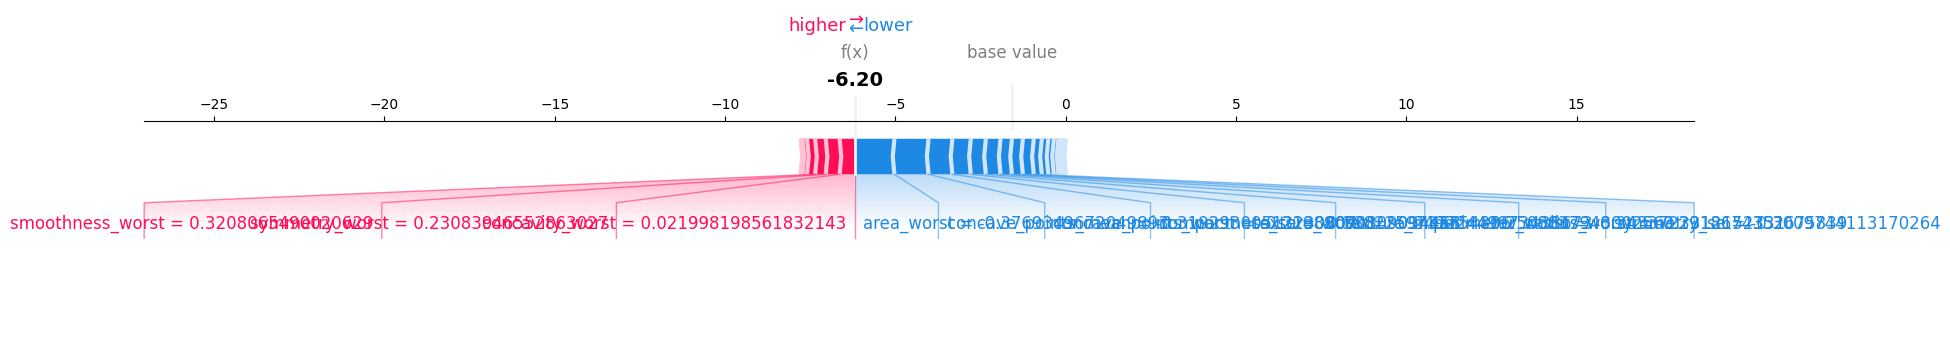

In [31]:
## 5. SHAP Force Plot (Single Prediction)

shap.force_plot(
    explainer.expected_value,     # The model's base value (e.g., average log-odds or probability)
    shap_values.values[0, :],     # SHAP values for the first sample (local contributions)
    X_sample.iloc[0, :],          # The actual feature values of the first sample
    matplotlib=True               # Render using matplotlib (offline, static)
)


## 🔄 **SHAP Force Plot – Single Prediction**

### 📌 Title: *“Why Did the Model Make This Specific Decision?”*

This **force plot** visualizes **how a single prediction was made**, showing how individual feature values **push the model’s output** away from the baseline toward the final decision.


### 🧩 How to Read This Plot

* **f(x) = -6.20**: The model’s prediction for this individual (e.g., patient, applicant, field sample).
* **Base value = 0**: The average model prediction across all samples (this varies depending on the classifier and its calibration).
* **Red features (left)**: These **increase the prediction toward the positive class**.
* **Blue features (right)**: These **decrease the prediction**, pushing the output toward the negative class.
* Each bar shows the **strength and direction of impact** of a feature.


### 🎯 What This Force Plot Tells Us

* Features like `smoothness_worst`, `symmetry_worst`, and `compactness_worst` had the **strongest positive (red) push**, moving the prediction higher.
* On the other hand, features like `area_worst`, `concavity_worst`, and many others pulled the prediction **strongly to the left (blue)**, resulting in a **low final output (-6.20)**.

🧠 **Conclusion**: This instance is **likely classified as “negative”** (e.g., benign, low-risk, or low-priority), because the **sum of negative forces outweighed the positives**.


### 💬 Teaching Insight for Conference Participants

* This plot is like **reading the mind of the model**.
* It shows **transparency at the individual level** — a key requirement for AI in:

  * **Healthcare** (e.g., patient risk scores)
  * **Finance** (e.g., loan approvals)
  * **Agriculture** (e.g., pest/disease warnings)
* With force plots, you can **defend**, **audit**, or **correct** a model's decision before it causes harm.


### 🧰 Tutorial Takeaway

> SHAP Force Plots make **AI decisions explainable per individual**, enabling personalized, ethical, and trusted AI in African communities.

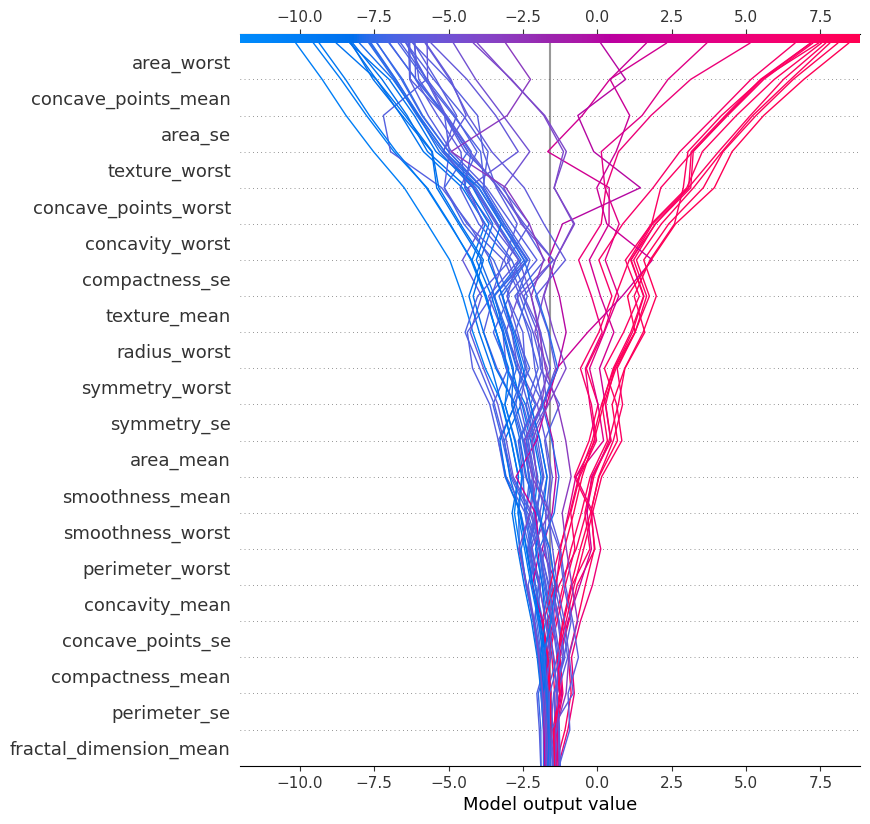

In [32]:
## 6.  SHAP Decision Plot - Cumulative Contributions
shap.decision_plot(
    explainer.expected_value,  # 🔹 Baseline (expected) model output
    shap_values.values,        # 🔹 SHAP values for all instances in X_sample
    X_sample                   # 🔹 Actual feature values for those instances
)


## 🔀 **SHAP Decision Plot**

### 📌 Title: *“How Did Each Feature Contribute to the Final Prediction?”*

This plot provides a **global view** of how individual features **cumulatively influence predictions** across multiple instances. It’s especially useful when comparing how the model **arrives at different outcomes** for different people or scenarios.


### 🧠 How to Read the Plot

* **X-axis**: The final output of the model (e.g., risk score or classification confidence).
  Values to the **right (positive)** indicate a higher model score; to the **left (negative)**, a lower score.

* **Y-axis**: Feature names, listed in the **order they were used** to build up the prediction.

* **Lines**: Each line represents **one sample's path** through the feature contributions — i.e., how a specific instance’s prediction evolved feature-by-feature.

* **Color**: Feature value intensity:

  * 🔵 Blue = Low feature value
  * 🔴 Red = High feature value


### 🧩 Interpretation of This Example

* Most samples with high values in `area_worst` and `concave_points_mean` move **rightward** → increasing the model output (e.g., signaling higher risk or positive prediction).
* Conversely, low values in `area_se`, `compactness_se`, etc. result in **leftward movement** → reducing the prediction.
* You can visually track **which features cause divergence** between samples with high and low predictions.


### 🧬 Real-World Application (Health Example)

Imagine predicting whether a tumor is malignant:

* A sample line that moves right quickly from the base value indicates **high-risk characteristics**.
* A sample line that stays leftward shows **low-impact or risk-reducing** features.


### 👩🏾‍🏫 Teaching Insight

This plot answers:

> “What makes two people (or crops, or customers) get very different predictions from the same model?”

It promotes:

* **Transparency**: Traceable paths from base value to final score
* **Fairness auditing**: Investigate if certain groups always follow similar (biased) paths
* **Trust**: Helps explain predictions to doctors, farmers, or decision-makers

### 🧰 Takeaway for Your Tutorial

> SHAP Decision Plots reveal the **journey behind each prediction**, making black-box AI **narratable and contestable** — a crucial step for **ethical AI adoption** in African public and private sectors.

### 🔍 Discussion Topic: Are SHAP Explanations Consistent?

#### ✅ Are SHAP explanations consistent?
Yes—consistency is a fundamental property of SHAP. It ensures:
- If a feature’s true importance increases, SHAP values reflect that.
- Explanations are stable across similar instances (within the same model and data distribution).

SHAP is grounded in game theory and satisfies **local accuracy**, **consistency**, and **missingness**. This makes SHAP one of the most reliable tools for model explanation.

#### ⚠️ What about outliers and misclassified examples?
- **Outliers**: SHAP may assign large contributions to rare features or edge cases.
- **Misclassifications**: SHAP explains what the model *thought*, even if it was wrong. This is powerful for debugging and auditing.

Use these cases to investigate:
- Shortcut learning (e.g., model picking up artifacts)
- Poor generalization
- Conflicting feature contributions

---

### 🧠 Questions for Discussion
- Do large SHAP values always mean the feature is truly important?
- Should we always trust the model if SHAP gives a "plausible" explanation?
- Can we find and fix failure cases just by exploring SHAP plots?


## Step 4: LIME Explanation (Single Instance)

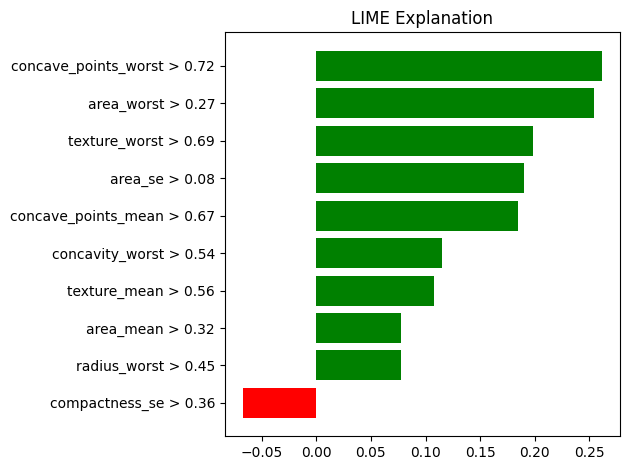

In [ ]:
# === LIME Explanation for Tabular Data ===

# Ensure lime_tabular is imported if not already
from lime.lime_tabular import LimeTabularExplainer # Uncomment if needed

# 4️⃣ Initialize LIME explainer
# Pass X_train (which is now a numpy array after StandardScaler) directly
explainer = LimeTabularExplainer(
    training_data=X_train,  # Use the numpy array directly
    feature_names=X.columns.tolist(),
    class_names=['Low', 'High'],
    mode='classification'
)

# 5️⃣ Explain a specific instance
# Access the row of the numpy array X_test directly
exp = explainer.explain_instance(
    data_row=X_test.iloc[5],     # choose an instance using integer position indexing
    predict_fn=model.predict_proba,     # model probability predictions
    num_features=10                     # show top 10 contributing features
)

# 6️⃣ Visualize LIME explanation
exp.show_in_notebook(show_table=True)

# Optional: plot as a figure
fig = exp.as_pyplot_figure()
plt.title("LIME Explanation")
plt.tight_layout()
plt.show()

In [37]:
# === LIME Explanation for Tabular Data ===

# Ensure lime_tabular is imported if not already
# from lime.lime_tabular import LimeTabularExplainer # Already imported in a commented block above, uncomment if needed

# 4️⃣ Initialize LIME explainer
# Pass X_train (which is now a numpy array after StandardScaler) directly
explainer = LimeTabularExplainer(
    training_data=X_train,  # Use the numpy array directly
    feature_names=X.columns.tolist(),
    class_names=['Low', 'High'],
    mode='classification'
)

# 5️⃣ Explain a specific instance
# Access the row of the numpy array X_test directly
exp = explainer.explain_instance(
    data_row=X_test[5],          # choose an instance using numpy indexing
    predict_fn=model.predict_proba,     # model probability predictions
    num_features=10                     # show top 10 contributing features
)

# 6️⃣ Visualize LIME explanation
exp.show_in_notebook(show_table=True)

# Optional: plot as a figure
fig = exp.as_pyplot_figure()
plt.title("LIME Explanation")
plt.tight_layout()
plt.show()

KeyError: 5

In [36]:
# === LIME Explanation for Tabular Data ===

#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split
#from lime.lime_tabular import LimeTabularExplainer

# 1️⃣ Load and preprocess the dataset
#df = pd.read_csv("data.csv").dropna()

# 🔄 Convert diagnosis labels: 'B' = 0 (Benign), 'M' = 1 (Malignant)
#df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

# 📂 Separate features and target
#X = df.iloc[:, :-1]
#y = df.iloc[:, -1]

# 🔁 Optional: convert to binary if needed (for uniformity)
#y_binary = (y > y.median()).astype(int)

# 2️⃣ Train/test split
#X_train, X_test, y_train, y_test = train_test_split(
#    X, y_binary, test_size=0.2, random_state=42
#)

# 3️⃣ Train a classifier (e.g., Random Forest)
#model = RandomForestClassifier(random_state=42)
#model.fit(X_train, y_train)

# 4️⃣ Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X.columns.tolist(),
    class_names=['Low', 'High'],
    mode='classification'
)

# 5️⃣ Explain a specific instance
exp = explainer.explain_instance(
    data_row=X_test.values[5],          # choose an instance
    predict_fn=model.predict_proba,     # model probability predictions
    num_features=10                     # show top 10 contributing features
)

# 6️⃣ Visualize LIME explanation
exp.show_in_notebook(show_table=True)

# Optional: plot as a figure
fig = exp.as_pyplot_figure()
plt.title("LIME Explanation")
plt.tight_layout()
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [34]:
# === LIME Explanation for Tabular Data ===


# 4️⃣ Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X.columns.tolist(),
    class_names=['Low', 'High'],
    mode='classification'
)

# 5️⃣ Explain a specific instance
exp = explainer.explain_instance(
    data_row=X_test.values[5],          # choose an instance
    predict_fn=model.predict_proba,     # model probability predictions
    num_features=10                     # show top 10 contributing features
)

# 6️⃣ Visualize LIME explanation
exp.show_in_notebook(show_table=True)

# Optional: plot as a figure
fig = exp.as_pyplot_figure()
plt.title("LIME Explanation")
plt.tight_layout()
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'values'

## 🧾 Overview: Prediction Context

* **Target**: Binary classification (`Low` vs `High`)
* **Model Output**:

  * Low: **0.03**
  * High: **0.97** ← 🟧 model strongly predicts **High**
* **Instance Explained**: Row from your test set

---

## 🔍 Plot Explanations (Top to Bottom)

---

### 1. **Prediction Probabilities (Top-Left)**

* **Bar graph showing model confidence** for each class.
* 🟧 "High": 0.97 → very high confidence
* 🟦 "Low": 0.03 → very low confidence

👉 This confirms the model is **very confident** the sample belongs to the “High” class.

---

### 2. **Interactive Feature Contribution Table (Top-Right)**

Shows the **exact values of features** used for this instance, highlighting:

* 🟧 Features **pushing towards "High"**
* 🟦 Features **pushing towards "Low"**

#### Example:

* `fractal_dimension_mean = 0.07` contributes **+0.14** to “High”
* `area_mean = 1265.00` contributes **−0.02** to “Low”

These contributions are **local explanations**—specific to this one row.

---

### 3. **Explanation Rule Summary (Center-Left Text)**

Displays **interpretable rules** LIME generated using **decision tree logic**:

* `fractal_dimension_mean > 0.07` → pushes prediction toward "High"
* `symmetry_se > 0.02` → pushes toward "Low"

These rules explain **what LIME learned** about this specific instance using its perturbation-based approach.

---

### 4. **Bar Chart: LIME Explanation (Bottom)**

A **horizontal bar chart** showing each feature’s contribution:

* 🟩 **Green** bars = Positive influence → push toward **"High"**
* 🟥 **Red** bars = Negative influence → push toward **"Low"**

#### Ranked Contributions:

| Feature Rule                    | Contribution |
| ------------------------------- | ------------ |
| `fractal_dimension_mean > 0.07` | +0.13        |
| `compactness_worst > 0.34`      | +0.11        |
| `fractal_dimension_se > 0.01`   | +0.07        |
| `symmetry_se > 0.02`            | −0.02        |
| `area_mean > 767.60`            | −0.02        |

✅ This bar chart is **the most intuitive** visual—great for showing decision-makers and students **which features mattered most**.

---

## 🧠 Takeaway (for Tutorial)

> LIME breaks down a complex model’s decision into **interpretable rules and feature weights**, giving us a **local view** of why a particular prediction was made. The visual summary shows which features pushed the model toward “High” and which ones resisted.

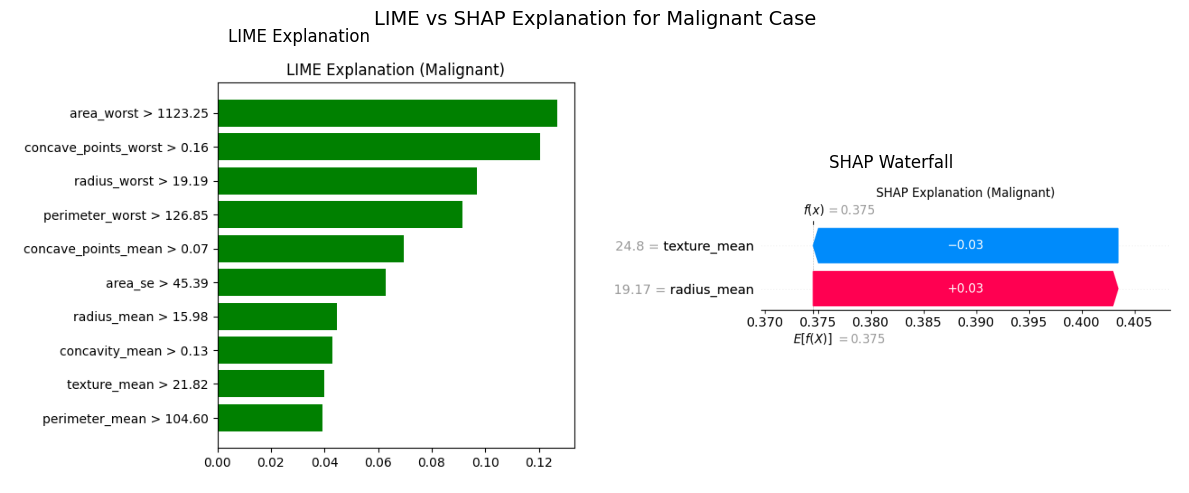

In [ ]:
# === STEP 2: Train Random Forest Classifier ===

# === STEP 3: LIME Explanation ===
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['Benign', 'Malignant'],
    mode='classification'
)

# Pick one instance with predicted class = 1 (Malignant)
y_pred = model.predict(X_test)
malignant_idx = np.where(y_pred == 1)[0][0]
instance = X_test.iloc[malignant_idx]

lime_exp = lime_explainer.explain_instance(
    data_row=instance.values,
    predict_fn=model.predict_proba,
    labels=[1],
    num_features=10
)

# Save LIME plot
fig_lime = lime_exp.as_pyplot_figure(label=1)
plt.title("LIME Explanation (Malignant)")
plt.tight_layout()
lime_path = "lime_explanation.png"
fig_lime.savefig(lime_path)
plt.close()

# === STEP 4: SHAP Explanation ===
shap_explainer = shap.TreeExplainer(model)
shap_values = shap_explainer.shap_values(X_test)

# Use class 1 (Malignant)
shap_instance = shap_values[1][malignant_idx]
shap_base_value = shap_explainer.expected_value[1]

# Create Explanation object
shap_exp = shap.Explanation(
    values=shap_instance,
    base_values=shap_base_value,
    data=instance.values,
    feature_names=X_test.columns
)

# Plot SHAP Waterfall
shap.plots.waterfall(shap_exp, show=False)
plt.title("SHAP Explanation (Malignant)")
plt.tight_layout()
shap_path = "shap_explanation.png"
plt.savefig(shap_path)
plt.close()

# === STEP 5: Side-by-Side Comparison ===
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

lime_img = plt.imread(lime_path)
shap_img = plt.imread(shap_path)

axes[0].imshow(lime_img)
axes[0].axis('off')
axes[0].set_title("LIME Explanation")

axes[1].imshow(shap_img)
axes[1].axis('off')
axes[1].set_title("SHAP Waterfall")

plt.suptitle("LIME vs SHAP Explanation for Malignant Case", fontsize=14)
plt.tight_layout()
plt.savefig("lime_vs_shap_comparison.png")
plt.show()


## 🧠 LIME vs SHAP Explanation for Malignant Case

**Context:**
This side-by-side visual compares two model explainability techniques—**LIME** and **SHAP**—on the same breast cancer test instance where the model predicted the tumor as **Malignant**.

---

### ✅ Left: LIME Explanation (Bar Plot)

* **What LIME shows:**
  LIME perturbs the input instance and observes how the prediction changes. It then fits a simple interpretable model (e.g., linear regression) locally around that prediction.

* **How to read this chart:**

  * Each bar represents a feature and its local importance for predicting **Malignant**.
  * **Green bars** mean the feature **supports** the prediction of **Malignant** (class 1).
  * The features are sorted by their absolute contribution to the prediction.

* **Top influential features in this case:**

  * `area_worst > 1123.25`
  * `concave_points_worst > 0.16`
  * `radius_worst > 19.19`
  * These values pushed the prediction toward "Malignant."

* **Interpretation takeaway:**
  LIME reveals that larger tumor dimensions (area, radius, concave points) locally drove the classifier to identify this tumor as malignant.

---

### ✅ Right: SHAP Explanation (Waterfall Plot)

* **What SHAP shows:**
  SHAP decomposes the model output (log-odds or probability) into contributions from each feature, grounded in **Shapley values** from cooperative game theory.

* **How to read this plot:**

  * The **base value** (𝔼\[f(X)]) is the average model prediction across the training data (≈ 0.375).
  * Each bar shows how an individual feature **pushes** the prediction away from the base.

    * **Red bars** push the prediction **higher** toward malignant.
    * **Blue bars** push the prediction **lower** toward benign.
  * The final value (f(x)) = sum of all contributions + base value = model output.

* **Key points in this case:**

  * `radius_mean` pushed the output slightly toward **Malignant** (+0.03).
  * `texture_mean` pushed it slightly toward **Benign** (−0.03).
  * The net result = no strong push from any single feature → model is **uncertain** or prediction score is close to 0.5.

---

### 🔍 What Can We Learn?

| Aspect                | LIME                          | SHAP                                  |
| --------------------- | ----------------------------- | ------------------------------------- |
| Focus                 | Local approximation           | Global + Local (theory-grounded)      |
| Output                | Feature importance (local)    | Feature attribution (additive)        |
| Decision Basis        | Perturb + surrogate model     | Marginal contribution of each feature |
| Result Interpretation | Most impactful local features | Feature push toward prediction        |

---

### 🎓 Talking Points for the Session

* **LIME is intuitive** but lacks consistency (different runs may differ slightly).
* **SHAP is theoretically sound** and consistent, especially for tree models.
* Use **LIME for fast, human-readable what-if explanations.**
* Use **SHAP for detailed, model-faithful explanation pipelines.**
* **In practice:** Use both together for triangulating decisions and stakeholder confidence.

## Step 5: Discussion
- Are the explanations consistent?
- What happens when we test on outliers or misclassified examples?

## 🔍 **Topic for Discussion:**

### *Are the explanations consistent? What happens when we test on outliers or misclassified examples?*

---

### ✅ **1. Are LIME Explanations Consistent?**

**LIME is local**, meaning:

* It explains **one prediction at a time**.
* It fits a simple model (e.g., linear or decision tree) around the neighborhood of that prediction.
* Therefore, **explanations can vary** even for similar samples if the local neighborhood is different.

**Implications**:

* LIME explanations may not be **globally consistent**.
* **Two nearby instances** might receive **different feature attributions**.
* This variability can arise from:

  * Slight changes in input values
  * Sampling noise in LIME’s perturbation process

🧠 **Teaching Point**: Consistency is not guaranteed because **LIME sacrifices global fidelity for local interpretability**.

---

### ✅ **2. What Happens with Outliers or Misclassified Examples?**

#### a. **On Outliers**

* LIME may struggle with **isolated data points** far from the training distribution.
* The **perturbations** generated by LIME might not resemble real data.
* Result: Explanations could be **unstable or misleading**.

#### b. **On Misclassified Samples**

* LIME still provides explanations—even if the prediction is wrong.
* The **features shown will explain why the model was wrong**.
* This is useful for:

  * **Debugging the model**
  * Identifying bias or overfitting
  * Spotting **shortcut learning** (e.g., models latching on spurious correlations)

📍**Key Insight**: A **correct explanation of a wrong prediction** can still reveal deep issues with model behavior.

---

### 📊 Example Discussion Slide

| Scenario                  | What to Observe                       | What to Discuss                         |
| ------------------------- | ------------------------------------- | --------------------------------------- |
| Consistent explanations   | Same features dominate across samples | Good generalization or data homogeneity |
| Inconsistent explanations | Feature weights flip unpredictably    | Data sparsity, unstable local fitting   |
| Misclassified examples    | Model focuses on irrelevant features  | Shortcut learning or noise sensitivity  |
| Outlier cases             | Unusual rules, fragmented heatmaps    | Perturbations leave data manifold       |

---

### 🗣 Suggested Prompt for Workshop Dialogue

> *When LIME explains a wrong prediction, is it the model that’s wrong or the explanation? How do we decide whether to trust what LIME shows us?*